In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_rows = 100

### Read in data:

In [2]:
# ELena's flights_with_weather data contains flights for top 10 locations over Dec-Jan 2018 and Dec-Jan 2019
# Passenger data contains ROUTE SPECIFIC data for the entire MONTH

flights = pd.read_csv('flights_with_weather.csv')
passengers = pd.read_csv('passengers_jan-dec_18-19.csv')

In [3]:
flights = flights.sort_values(by=['fl_date'])

In [47]:
flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,day_of_the_week,origin_wind_speed,origin_visibility,origin_conditions,dest_wind_speed,dest_visibility,dest_conditions,year,month,route_info
60659,2018-01-01,UA,UA,UA,745,UA,N848UA,745,12953,LGA,...,1,14.8,9.9,Clear,12.3,9.1,Partially cloudy,2018,12,11057-13930-2018-12
23125,2018-01-01,UA,UA_CODESHARE,UA,3582,YX,N649RW,3582,11298,DFW,...,1,NaN,NaN,NaN,12.3,9.1,Partially cloudy,2018,01,11278-13930-2018-12
3646,2018-01-01,UA,UA,UA,1591,UA,N87527,1591,11298,DFW,...,1,NaN,NaN,NaN,5.6,4.2,Clear,2018,01,13930-12953-2018-01
73558,2018-01-01,WN,WN,WN,5500,WN,N8685B,5500,11292,DEN,...,1,12.3,9.1,Partially cloudy,14.6,9.9,Partially cloudy,2018,12,11278-11298-2018-01
77601,2018-01-01,WN,WN,WN,415,WN,N8690A,415,12892,LAX,...,1,5.6,4.2,Clear,12.7,9.9,Clear,2018,12,12264-12892-2018-12


In [5]:
flights.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'first_dep_time', 'total_add_gtime', 'longest_add_gtime', 'no_name',
       'day_of_the_week', 'origin_wind_speed', 'origin_visibility',
       'origin_conditions', 'dest_wind_speed', 'dest_visibility',
       'dest_conditions'],
      dtype='object')

In [6]:
flights['dest_city_name'].unique() # will have to rename the city names to coincide with passengers

array(['denver', 'los angeles', 'atlanta', 'chicago', 'new york',
       'dallas/fort worth', 'charlotte', 'seattle', 'washington',
       'houston'], dtype=object)

In [46]:
passengers.head()

,departures_scheduled,departures_performed,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,unique_carrier,...,origin_airport_id,origin_city_market_id,origin_city_name,dest_airport_id,dest_city_market_id,dest_city_name,year,month,route_info,departures_cancelled
0,54,53,9437,7536,49137,3689,1660,11961,10273,AS,...,14747,30559,"Seattle, WA",11298,30194,"Dallas/Fort Worth, TX",2018,1,14747-11298-2018-1,1
1,54,54,4104,3583,0,0,1235,12055,9782,OO,...,11298,30194,"Dallas/Fort Worth, TX",12892,32575,"Los Angeles, CA",2018,1,11298-12892-2018-1,0
2,54,54,4104,3841,0,0,954,9305,7223,OO,...,14747,30559,"Seattle, WA",12892,32575,"Los Angeles, CA",2018,1,14747-12892-2018-1,0
3,54,53,9275,7655,12897,0,1452,9941,8887,WN,...,11292,30325,"Denver, CO",12264,30852,"Washington, DC",2018,1,11292-12264-2018-1,1
4,54,49,7721,6146,13844,1904,760,6457,4907,DL,...,10397,30397,"Atlanta, GA",12478,31703,"New York, NY",2018,1,10397-12478-2018-1,5


# Set some new columns:
- Year
- Month
- Weekday (as number)
- Hour (24hour clock)
- Holiday (1 for yes, 0 for no)
- Holiday_Weekend (1 for yes, 0 for no)

In [9]:
# year
year_vector = []
for i in flights['fl_date'].values:
    year_vector.append(i[0:4])

flights['year'] = pd.DataFrame(year_vector)

In [10]:
# month
month_vector = []
for i in flights['fl_date'].values:
    month_vector.append(i[5:7])

flights['month'] = pd.DataFrame(month_vector)

In [11]:
flights['day_of_the_week'].value_counts()

Monday       32897
Tuesday      31587
Wednesday    31058
Sunday       30056
Thursday     29977
Friday       28487
Saturday     23210
Name: day_of_the_week, dtype: int64

In [12]:
#
# NOTE: I have commented this out because I believe it might be better to one_hot_encode these to identify the data better
#

# # weekday
# weekday_dict = {
#     'Sunday' : 0,
#     'Monday': 1,
#     'Tuesday' : 2,
#     'Wednesday' : 3,
#     'Thursday' : 4,
#     'Friday' : 5,
#     'Saturday' : 6
# }

# flights['day_of_the_week'] = flights['day_of_the_week'].replace(weekday_dict)
# flights['day_of_the_week'].value_counts()

In [51]:
flights.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'first_dep_time', 'total_add_gtime', 'longest_add_gtime', 'no_name',
       'day_of_the_week', 'origin_wind_speed', 'origin_visibility',
       'origin_conditions', 'dest_wind_speed', 'dest_visibility',
       'dest_conditions', 'year', 'month', 'route_info'],
      dtype='object')

In [52]:
flights[['crs_dep_time', 'dep_time']]

,crs_dep_time,dep_time
60659,1453,1440.0
23125,2016,2005.0
3646,545,539.0
73558,1820,1818.0
77601,1225,1226.0
...,...,...
140619,1959,2005.0
106829,845,931.0
106104,1300,1253.0
103182,945,937.0


In [14]:
# hour (24 hour)


In [15]:
# holiday (1 for yes, 0 for no)

In [16]:
# holiday_weekend (1 for yes, 0 for no)

# Add `route_info` column to `passengers` and `flights`
adding a column to contain information about the flight route:

    `route_info = (origin_airport_id, dest_airport_id, year, month)`

In [17]:
passengers[['origin_airport_id', 'dest_airport_id', 'year', 'month']].head()

,origin_airport_id,dest_airport_id,year,month
0,14747,11298,2018,1
1,11298,12892,2018,1
2,14747,12892,2018,1
3,11292,12264,2018,1
4,10397,12478,2018,1


### Passenger `route_info`

In [18]:
route_info = []
sep = '-'

# iterate over the entire dataframe, constructing the route_info
for i in range(len(passengers[['origin_airport_id', 'dest_airport_id', 'year', 'month']])):
    route_info.append(str(passengers.iloc[i].origin_airport_id) + sep + str(passengers.iloc[i].dest_airport_id) + sep + str(passengers.iloc[i].year) + sep + str(passengers.iloc[i].month))

passengers['route_info'] = pd.DataFrame(route_info)

### Flights `route_info`

In [19]:
# NOTE************************
# I comment this out because this step takes a while, 
# I believe there's a better way to implement this but for now this works
#

# route_info = []
# sep = '-'

# # iterate over the entire dataframe, constructing the route_info
# for i in range(len(flights[['origin_airport_id', 'dest_airport_id', 'year', 'month']])):
#     route_info.append(str(flights.iloc[i].origin_airport_id) + sep + str(flights.iloc[i].dest_airport_id) + sep + str(flights.iloc[i].year) + sep + str(flights.iloc[i].month))

# flights['route_info'] = pd.DataFrame(route_info)

In [20]:
flights['route_info'].value_counts()[:5]

13930-12953-2018-12    1198
12953-13930-2018-12    1191
13930-12953-2019-12    1173
13930-12953-2018-01    1137
12953-13930-2018-01    1137
Name: route_info, dtype: int64

In [42]:
# this is an example of a SPECIFIC route, for December 2019 
# CHICAGO, IL to ATLANTA, GA
passengers[passengers['route_info'] == '13930-10397-2019-12'][[
    'departures_performed', 
    'unique_carrier', 'unique_carrier_name', 
    'aircraft_type', 
    'origin_airport_id', 'dest_airport_id', 
    'route_info', 'origin_city_name', 'dest_city_name', 
    'air_time', 
    'passengers', 'freight', 'mail'
]].sort_values(by=['unique_carrier_name']).head(5)

,departures_performed,unique_carrier,unique_carrier_name,aircraft_type,origin_airport_id,dest_airport_id,route_info,origin_city_name,dest_city_name,air_time,passengers,freight,mail
5058,3,ZW,Air Wisconsin Airlines Corp,629,13930,10397,13930-10397-2019-12,"Chicago, IL","Atlanta, GA",255,124,0,0
5767,55,AA,American Airlines Inc.,698,13930,10397,13930-10397-2019-12,"Chicago, IL","Atlanta, GA",4774,6357,40,0
5815,57,AA,American Airlines Inc.,614,13930,10397,13930-10397-2019-12,"Chicago, IL","Atlanta, GA",4935,7775,1532,0
4602,26,OZ,Asiana Airlines Inc.,820,13930,10397,13930-10397-2019-12,"Chicago, IL","Atlanta, GA",0,0,1903374,0
4537,1,DL,Delta Air Lines Inc.,655,13930,10397,13930-10397-2019-12,"Chicago, IL","Atlanta, GA",84,0,0,0


# Passenger Table Analysis
- Note how there are quite a few airlines with 0 flights scheduled and they still have flights performed, I imagine these flights would contribute to flight delays

In [22]:
# look at flight types (passengers, freight, mail), as well as the carrier, the air time, and the departure information
#
#

passengers['departures_cancelled'] = passengers['departures_scheduled'] - passengers['departures_performed']
passengers[[
    'departures_cancelled', 'departures_scheduled', 'departures_performed', 'unique_carrier', 'unique_carrier_name', 'route_info', 'air_time', 'passengers', 'freight', 'mail'
]].groupby(by=['unique_carrier'], as_index=True).sum().sort_values(by='departures_cancelled', ascending=False)[:100]

,departures_cancelled,departures_scheduled,departures_performed,air_time,passengers,freight,mail
unique_carrier,,,,,,,
AA,909,53090,52181,7616905,6977274,20518112,15921137
WN,755,23993,23238,3162328,2914262,8312732,0
YX,520,12255,11735,1046916,585726,0,0
OO,228,6605,6377,786621,367622,0,0
UA,181,33701,33520,5168419,4761833,14765564,16486863
B6,171,5005,4834,1122992,584030,0,0
AS,158,9633,9475,1992831,1317512,3449093,2210369
9E,108,3379,3271,281534,166821,0,0
OH,97,2694,2597,148552,137991,15276,2367


In [23]:
departure_data = passengers[[
    'departures_cancelled', 'departures_scheduled', 'departures_performed', 'unique_carrier', 'unique_carrier_name', 'route_info', 'air_time', 'passengers', 'freight', 'mail'
]].groupby(by=['unique_carrier'], as_index = False).sum().sort_values(by='departures_cancelled', ascending=False)[:100]

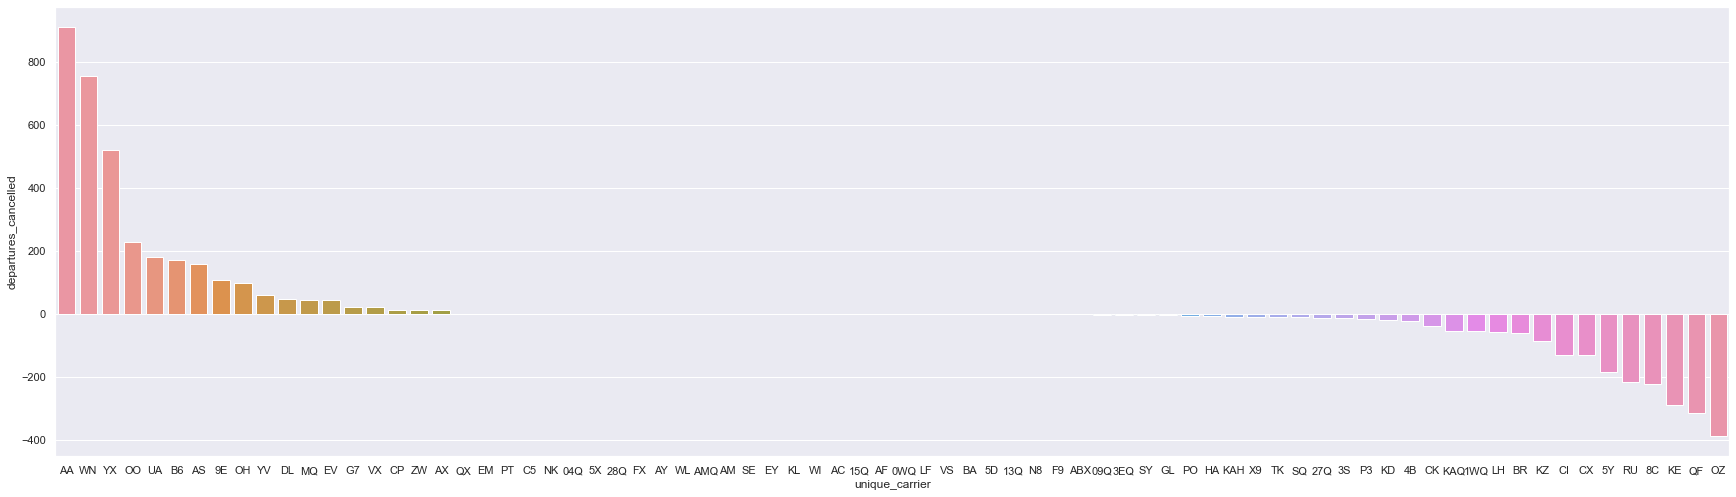

In [24]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(30,8.27)})
tips = sns.load_dataset("tips")
ax = sns.barplot(x="unique_carrier", y="departures_cancelled", data=departure_data)

### The graph above shows that there are a considerable number of flights that are not scheduled, yet still take place. I've tried to look up information about these flights in the `flights` table but they are hard to track as both the `unique_carrier` and `unique_carrier_name` are not present in the `flights` table

In [25]:
flights[flights['op_unique_carrier'] =='OZ']

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,day_of_the_week,origin_wind_speed,origin_visibility,origin_conditions,dest_wind_speed,dest_visibility,dest_conditions,year,month,route_info


# Flights Table Analysis

In [26]:
flights.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'first_dep_time', 'total_add_gtime', 'longest_add_gtime', 'no_name',
       'day_of_the_week', 'origin_wind_speed', 'origin_visibility',
       'origin_conditions', 'dest_wind_speed', 'dest_visibility',
       'dest_conditions', 'year', 'month', 'route_info'],
      dtype='object')

In [27]:
mean_ = flights['arr_delay'].mean()
max_ = flights['arr_delay'].max()
min_ = flights['arr_delay'].min()

print(f'Mean flight delay: {mean_}\nMax flight delay: {max_}\nMin flight delay: {min_}')

Mean flight delay: 2.787263772987551
Max flight delay: 1557.0
Min flight delay: -208.0


<AxesSubplot:xlabel='arr_delay', ylabel='Count'>

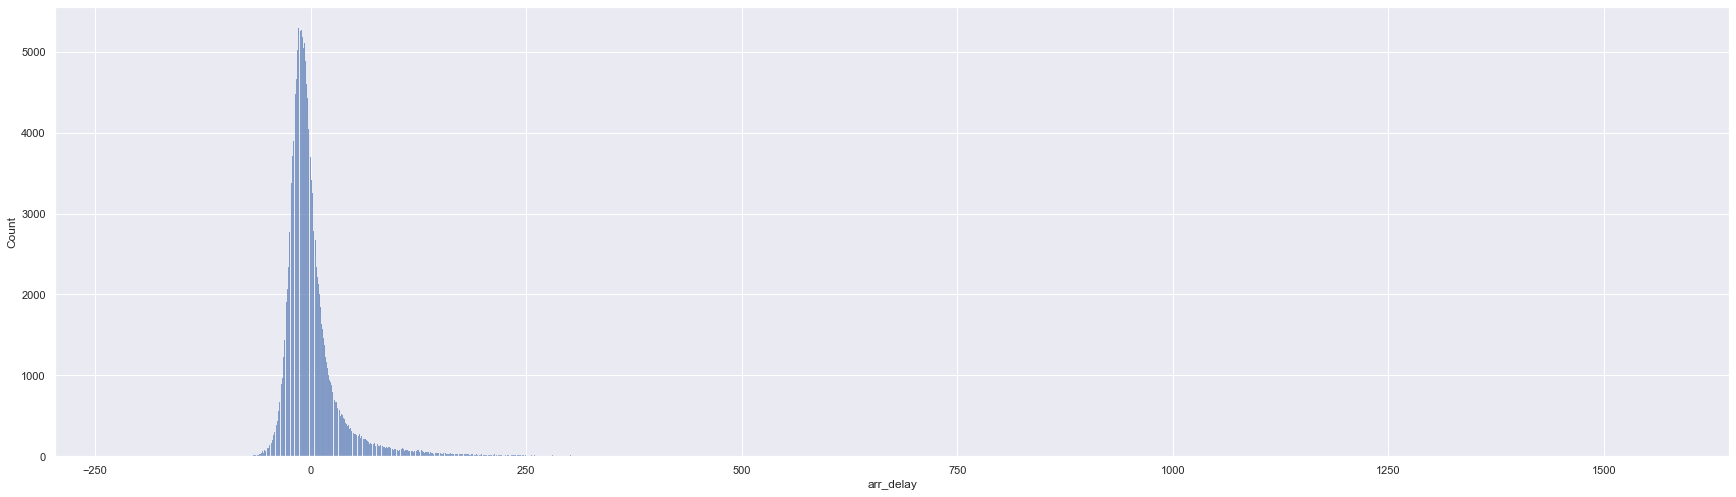

In [28]:
sns.histplot(data=flights, x="arr_delay")

<AxesSubplot:xlabel='arr_delay_scaled', ylabel='Count'>

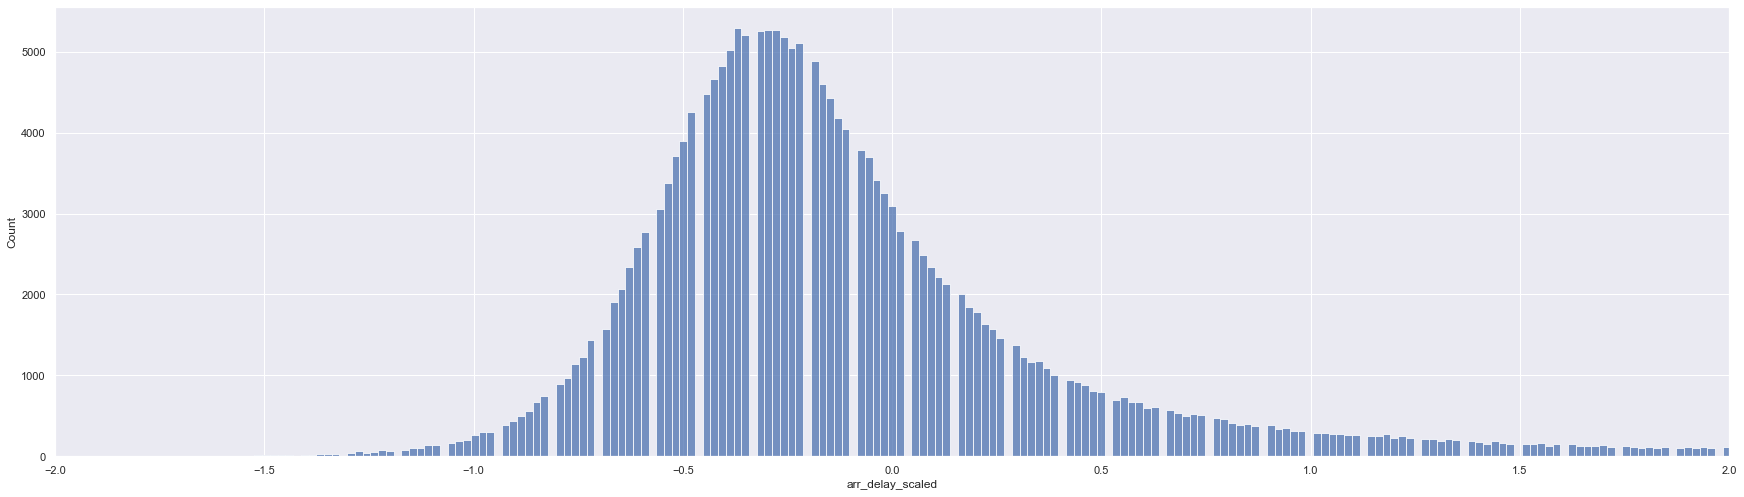

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # create a scalar
hist_x = scaler.fit(flights['arr_delay'].values.reshape(-1,1)) # teach the scalar the arr_delay values
hist_x = hist_x.transform(flights['arr_delay'].values.reshape(-1,1)) # transform the values on a scale from 0 to 1
hist_x = pd.DataFrame(hist_x) # convert to a dataframe to pass into sns object

rename_dict = {0 : 'arr_delay_scaled'} # creating a dictionary we will use in the next step (below)
hist_x = hist_x.rename(columns=rename_dict)  #  rename the column 0 to arr_ddelay_scaled for clarity (using dictionary from line above)
flights_arr_delay=(hist_x-hist_x.mean())/hist_x.std()
plt.xlim(-2, 2)
sns.histplot(data=flights_arr_delay, x="arr_delay_scaled")

### The graph above looks skewed to the right - this is **not** a normal distribution.

In [30]:
mean_ = flights_arr_delay['arr_delay_scaled'].mean()
median_ = flights_arr_delay['arr_delay_scaled'].median()
mode_ = flights_arr_delay['arr_delay_scaled'].mode()[0]

In [31]:
print(f'mean: {mean_}')
print(f'median: {median_}')
print(f'mode: {mode_}')
#print('If the median and the mode are both to the LEFT of the mean, the distribution is RIGHT skewed. A Normal distribution would be symmetrical.')

mean: 2.0337626953204282e-15
median: -0.21308382998008793
mode: -0.365484628043523


In [32]:
three_sigma = []
for i in (flights_arr_delay['arr_delay_scaled']):
    if i < abs(flights_arr_delay['arr_delay_scaled'].std()*3):
        three_sigma.append(i)
    #print(i)
three_sigma = pd.DataFrame(three_sigma)

In [33]:
percentage_of_data_within_three_stds = len(three_sigma) / len(flights_arr_delay)
percentage_of_data_within_three_stds

0.9718727083252924

### For a 3 standard deviation range, a normal distribution would contain 99.730% of all datapoints. Our distribution only has 97.187%. This reinforces that our distribution is **not** normal.

# Look at weather conditions

In [34]:
flights.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'first_dep_time', 'total_add_gtime', 'longest_add_gtime', 'no_name',
       'day_of_the_week', 'origin_wind_speed', 'origin_visibility',
       'origin_conditions', 'dest_wind_speed', 'dest_visibility',
       'dest_conditions', 'year', 'month', 'route_info'],
      dtype='object')

In [35]:
weather = flights[['origin_wind_speed', 'origin_visibility', 'origin_conditions', 'dest_wind_speed', 'dest_visibility' ,'dest_conditions']]

In [36]:
#weather_conditions['origin_conditions'].value_counts()

In [37]:
#weather_conditions['dest_conditions'].value_counts()

In [38]:
weather_conditions = weather[['origin_conditions', 'dest_conditions']]
weather_conditions_origin_conditions = weather_conditions['origin_conditions']
weather_conditions_origin_conditions = weather_conditions_origin_conditions.value_counts()

In [39]:
weather_conditions = weather[['origin_conditions', 'dest_conditions']]
weather_conditions_dest_conditions = weather_conditions['dest_conditions']
weather_conditions_dest_conditions = weather_conditions_dest_conditions.value_counts()

In [40]:
weather_conditions_totals = weather_conditions_origin_conditions + weather_conditions_dest_conditions
weather_conditions_totals

Partially cloudy          102849
Clear                      88244
Rain, Overcast             60536
Rain, Partially cloudy     48880
Overcast                   32612
Snow, Partially cloudy     14211
Rain                       10632
Snow, Overcast             10168
Snow                        9507
dtype: int64

In [41]:
flights[['arr_delay', 'hour']]

KeyError: "['hour'] not in index"

# Notes:
- We may want to begin with the exploratory_analysis notebook to familiarize ourselves with the project (I think we should aim to answer as many as possible).
- We will have to specify a target variable by identifying which flights are delayed, and quantify this value
- We will need to eliminate all relevant columns from causing our data to be biased or overfitted (all delay columns need to be removed)

Some ideas:
- Check how many airports there are; how many flights per airport; how many passengers per flight
- Do some airports have more delays than others?
- Weather; how should we quantify this; by geographic area? magnitude (1-10)? What weather conditions should we look for? (might be worth a google to see what are common weather delays for flights in certain areas)
- Time of day, day of week (weekend?)

In [ ]:
# look for "delay" columns, add to dictionary with column number as key
delay_list = {}

for i, name in enumerate(flights.columns):
    if ('delay') in (name):
        #print(name)
        delay_list[i] = name

In [ ]:
delay_list

# We can potentially use the weather delay to help us classify weather criteria for past measurements